# Pymaceuticals Inc.
---

### Analysis

- Consistent Starting Tumor Size: All mice begin the study with a tumor volume of 45.0 mm³, ensuring a uniform baseline for comparing treatments.

- Variety of Drug Treatments: The data includes different drug regimens, which allows for a meaningful comparison of their effectiveness.

- Diverse Mouse Demographics: The mice in the study vary in age, weight, and sex, which helps ensure the results are relevant across different groups.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
num_mice

249

In [65]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [66]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_id)]
duplicate_mouse_id

array(['g989'], dtype=object)

In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=merged_data[merged_data["Mouse ID"]!="g989"]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [68]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_unique_mice_cleaned

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_obj=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
groupby_obj

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
means=groupby_obj.mean()
medians=groupby_obj.median()
vars=groupby_obj.var()
stdev=groupby_obj.std()
sems=groupby_obj.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats=pd.DataFrame ({"Mean Tumor Volume": means, "Median Tumor Volume":medians, "Variance Tumor Volume":vars, 
                             "Standard Dev Tumor Vol":stdev, "St. Errors:":sems})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Vol,St. Errors:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
groupby_obj=cleaned_data.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
summary_table=groupby_obj.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

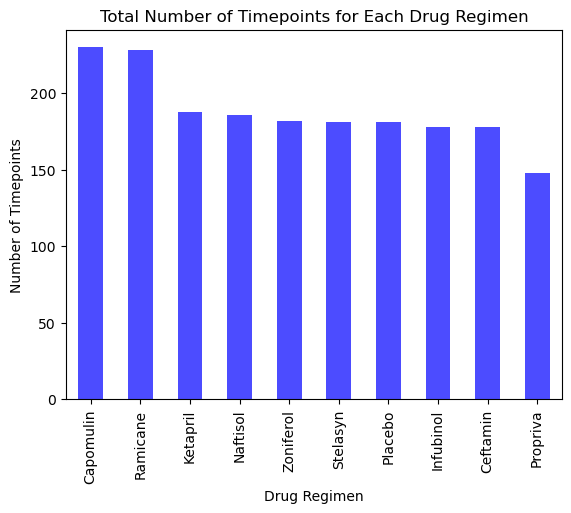

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_data["Drug Regimen"].value_counts()
timepoint_counts.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

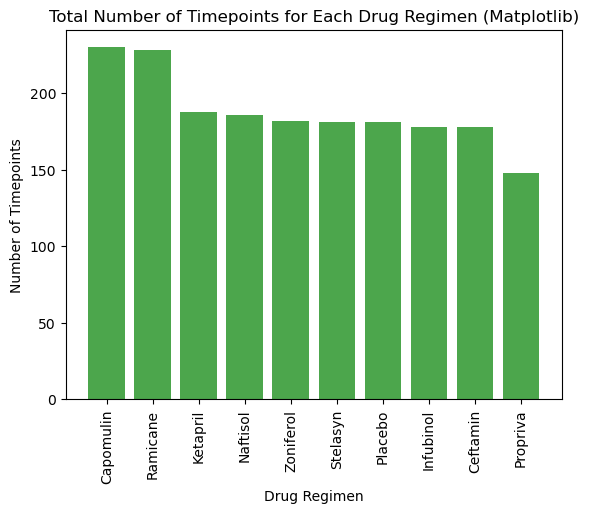

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_counts.index, timepoint_counts.values, color="green", alpha=0.7)
plt.title("Total Number of Timepoints for Each Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

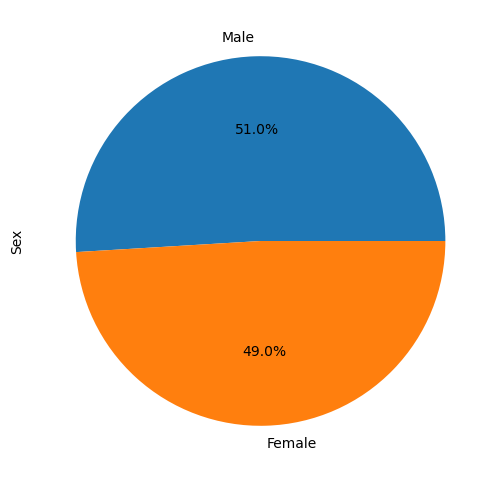

In [73]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ylabel="Sex", figsize=(8, 6))
plt.show()

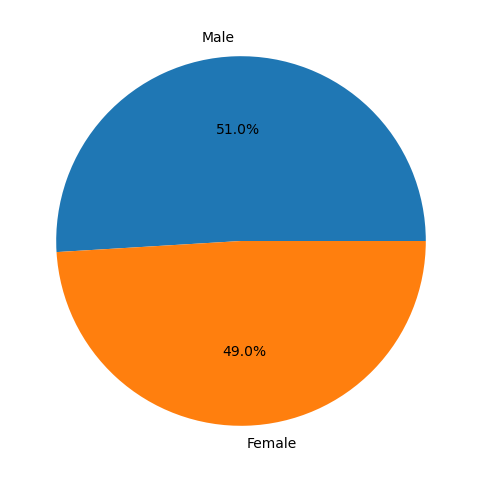

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data["Sex"].value_counts()

# Get the labels and sizes for the pie chart
labels = gender_distribution.index
sizes = gender_distribution.values

# Create the pie plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

In [76]:
# Put treatments into a list for for loop (and later for plot labels)
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in promising_drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(final_tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * iqr
    upper_bound = quartiles[0.75] + 1.5 * iqr
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    print(f"{drug} treatment outliers: {outliers}")

Capomulin treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol treatment outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


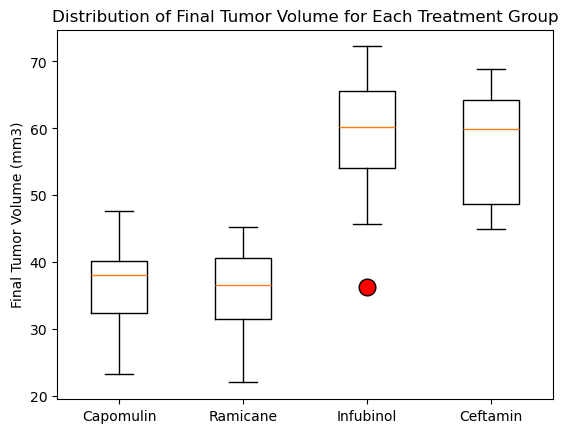

In [77]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=promising_drugs, flierprops={"markerfacecolor":"r", "markersize":12, "marker":"o"})
plt.title("Distribution of Final Tumor Volume for Each Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

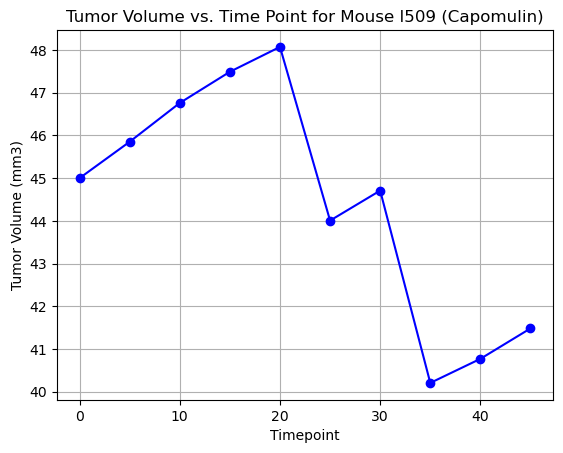

In [78]:
# Generate a line plot
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse from Capomulin treated mice
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse l509 (Capomulin)')

# Show the plot
plt.grid(True)
plt.show()

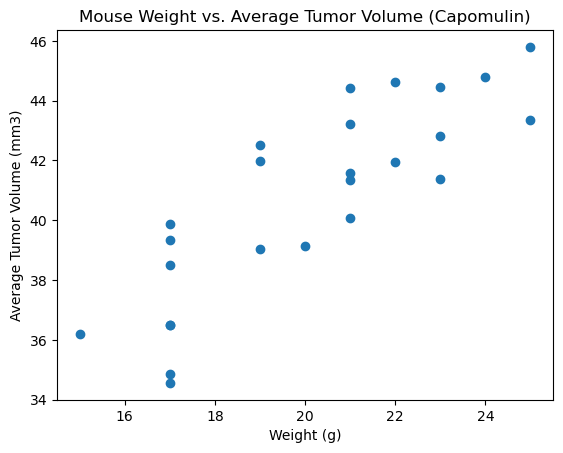

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean(numeric_only=True)
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.8419363424694722


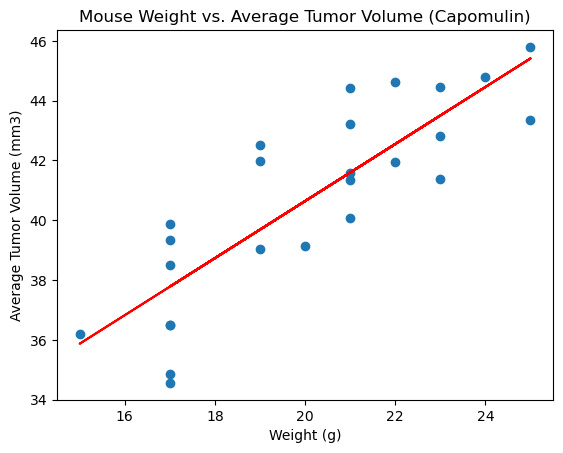

In [80]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_avg["Weight (g)"].corr(capomulin_avg["Tumor Volume (mm3)"])
print(f"Correlation between mouse weight and average tumor volume: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

# Scatter plot with regression line
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], intercept + slope * capomulin_avg["Weight (g)"], color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()